In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#Creates a custom Hodgkin and Huxley function
def HHmodel(Ie, dt, tFinal, tStimStart, tStimEnd, RestingPotential):
    import matplotlib.pyplot as plt
    # Defines the model parameters
    c     =  10 # capacitance per unit area (nF/mm^2)
    gMaxL =  3 # leak maximal conductance per unit area (mS/mm^2)
    EL    =  -54.387 # leak conductance reversal potential (mV)
    gMaxK =  360 # maximal K conductance per unit area (mS/mm^2)
    EK    =  -77 # K conductance reversal potential (mV)
    gMaxNa=  1200 # maximal Na conductance per unit area (mS/mm^2)
    ENa   =  50 # Na conductance reversal potential (mV)

    # sets up data structures to hold relevant variable vectors
    timeVec = np.arange(0,tFinal, dt)
    voltageVector = np.zeros(len(timeVec))
    Ivector = np.zeros(len(timeVec))
    mVec = np.zeros(len(timeVec))
    hVec = np.zeros(len(timeVec))
    nVec = np.zeros(len(timeVec))
    tauVec = np.zeros(len(timeVec))

    # assigns the initial value of each variable
    voltageVector[0] =  RestingPotential 
    mVec[0] = 0.0529
    hVec[0] = 0.5961
    nVec[0] = 0.3177

    # defines the stimulus
    tStimStart = int(tStimStart/dt) 
    tStimEnd = int(tStimEnd/dt) 
    Ivector[tStimStart:tStimEnd] = Ie 

    # For-loop integrates equations into model
    for v in range(len(timeVec)-1):
      # We include -1 because we already have the first value
      
        # Calculates alpha values for m, h, and n
        alpha_n = 0.01*(voltageVector[v] + 55) / (1-np.exp(-0.1*(voltageVector[v]+55)))
        alpha_m = (0.1*(voltageVector[v]+40)) / (1-np.exp(-0.1*(voltageVector[v]+40)))
        alpha_h = 0.07*np.exp(-.05*(voltageVector[v]+65))
    
        # Calculates beta values for m, h, and n
        beta_n = 0.125*np.exp(-.01125*(voltageVector[v]+55))
        beta_m = 4*np.exp(-.05556*(voltageVector[v]+65))
        beta_h = 1 / (1 + np.exp(-0.1*(voltageVector[v]+35)))
    
        # Calculates tau (time constant) values for m, h, and n
        tau_n = 1 / (alpha_n + beta_n)
        tau_m = 1 / (alpha_m + beta_m)
        tau_h = 1 / (alpha_h + beta_h)
    
        # Calculates infinity values for m, h, and n
        pm = alpha_m/(alpha_m + beta_m)
        pn = alpha_n/(alpha_n+ beta_n)
        ph = alpha_h/(alpha_h + beta_h)
    
        # Calculates and store values in m, h, and n vectors
        mVec[v+1] = pm + (mVec[v] - pm)*np.exp(-dt/tau_m)
        nVec[v+1] = pn + (nVec[v] - pn)*np.exp(-dt/tau_n)
        hVec[v+1] = ph + (hVec[v] - ph)*np.exp(-dt/tau_h)
    
        # Updates Vinf and tauV
        denominator = gMaxL + gMaxK*(nVec[v]**4) + gMaxNa*(mVec[v]**3)*hVec[v]
        tauV = c / denominator
        Vinf = ((gMaxL)*EL + gMaxK*(nVec[v]**4)*EK + \
          gMaxNa*(mVec[v]**3)*hVec[v]*ENa + Ivector[v])/denominator  
        
        # Calculates and store next voltage value in vector
        voltageVector[v+1] = Vinf + (voltageVector[v]-Vinf)*np.exp(-dt/tauV) 
    
    # Plotting
    plt.figure(1, figsize=(10,10))
    plt.subplot(4,1,1)
    plt.plot(timeVec,voltageVector)
    plt.title('Hodgkin and Huxley Simulation')
    plt.ylabel('Voltage in mV')
    plt.subplot(4,1,2)
    plt.plot(timeVec, mVec)
    plt.ylabel('g_Na activation variable m')
    plt.subplot(4,1,3)
    plt.plot(timeVec, hVec)
    plt.ylabel('g_Na inactivation variable h')
    plt.subplot(4,1,4)
    plt.plot(timeVec, nVec)
    plt.ylabel('g_K activation variable')
    plt.xlabel('Time in ms')

In [4]:
#creates a custom function that will determine the minimum Ie
# required to surpass the threshold potential

def HHmodel_threshold(Ie):
    tStimStart = 250
    tStimEnd   = 750
    dt          = 0.1 # time step (ms)
    tFinal      = 1000 # total time of run (ms)
    RestingPotential = -65
    c     = 10 # capacitance per unit area (nF/mm^2)
    gMaxL = 3 # leak maximal conductance per unit area (mS/mm^2)
    EL    =  -54.387 # leak conductance reversal potential (mV)
    gMaxK =  360 # maximal K conductance per unit area (mS/mm^2)
    EK    =  -77 # K conductance reversal potential (mV)
    gMaxNa=  1200 # maximal Na conductance per unit area (mS/mm^2)
    ENa   =  50 # Na conductance reversal potential (mV)
    
    
    for current in range(len(Ie)):
    
        timeVec = np.arange(0,tFinal, dt)
        voltageVector = np.zeros(len(timeVec))
        Ivector = np.zeros(len(timeVec))
        mVec = np.zeros(len(timeVec))
        hVec = np.zeros(len(timeVec))
        nVec = np.zeros(len(timeVec))
        tauVec = np.zeros(len(timeVec))
        voltageVector[0] =  RestingPotential 
        mVec[0] = 0.0529
        hVec[0] = 0.5961
        nVec[0] = 0.3177

        Ivector[2499:7499] = Ie[current]
        
        for v in range(len(timeVec)-1):
            alpha_n = 0.01*(voltageVector[v] + 55)/ (1-np.exp(-0.1*(voltageVector[v]+55)))
            alpha_m = (0.1*(voltageVector[v]+40))/ \
              (1-np.exp(-0.1*(voltageVector[v]+40)))
            alpha_h = 0.07*np.exp(-.05*(voltageVector[v]+65))
            beta_n = 0.125*np.exp(-.01125*(voltageVector[v]+55))
            beta_m = 4*np.exp(-.05556*(voltageVector[v]+65))
            beta_h = 1 / (1 + np.exp(-0.1*(voltageVector[v]+35)))
            tau_n = 1 / (alpha_n + beta_n)
            tau_m = 1 / (alpha_m + beta_m)
            tau_h = 1 / (alpha_h + beta_h)
            pm = alpha_m/(alpha_m + beta_m)
            pn = alpha_n/(alpha_n+ beta_n)
            ph = alpha_h/(alpha_h + beta_h)
            mVec[v+1] = pm + (mVec[v] - pm)*np.exp(-dt/tau_m)
            nVec[v+1] = pn + (nVec[v] - pn)*np.exp(-dt/tau_n)
            hVec[v+1] = ph + (hVec[v] - ph)*np.exp(-dt/tau_h)
            denominator = gMaxL + gMaxK*(nVec[v]**4) + gMaxNa*(mVec[v]**3)*hVec[v]
            tauV = c / denominator
            Vinf = ((gMaxL)*EL + gMaxK*(nVec[v]**4)*EK + \
              gMaxNa*(mVec[v]**3)*hVec[v]*ENa + Ivector[v])/ denominator   
            voltageVector[v+1] = Vinf + \
              (voltageVector[v]-Vinf)*np.exp(-dt/tauV) 
            
            # Checks to see if the given current resulted in an 
            # action potential 
            # Values around 25 mv is only reached if the neuron spikes. 
            # A value of 20 would similarly be appropriate
            if voltageVector[v] > 25: 
                return(print("With an external current of", Ie[current]-1 ,
                  "nA/mm^2 threshold potential was finally reached!")) 
            
    return(print("Looks like you didn't provide a large value in your range caused the neuron to spike. Try again!"))


In [10]:
# plots the behavior of a neuron when injected with different 
# currents on the same graphs
def HHmodel_compare(Ie, RestingPotential):
    terminate = 0
    tStimStart  =  10 
    tStimEnd    =  30 
    tFinal      =  50 
    dt          =  0.002 
    c           =  10 
    gMaxL       =  0.003e03 
    EL          =  -54.387 
    gMaxK       =  0.36e03 
    EK          =  -77 
    gMaxNa      =  1.2e03 
    ENa         =  50 
    
    for current in range(len(Ie)):
        timeVec = np.arange(0,tFinal, dt)
        voltageVector = np.zeros(len(timeVec))
        Ivector = np.zeros(len(timeVec))
        mVec = np.zeros(len(timeVec))
        hVec = np.zeros(len(timeVec))
        nVec = np.zeros(len(timeVec))
        tauVec = np.zeros(len(timeVec))
        
        voltageVector[0] = RestingPotential 
    
        mVec[0] = 0.0529
        hVec[0] = 0.5961
        nVec[0] = 0.3177

        Ivector[5000:15000] = Ie[current]
        
        for v in range(len(timeVec)-1):
            alpha_n = 0.01*(voltageVector[v] + 55) / \
              (1-np.exp(-0.1*(voltageVector[v]+55)))
            alpha_m = (0.1*(voltageVector[v]+40))/ \
              (1-np.exp(-0.1*(voltageVector[v]+40)))
            alpha_h = 0.07*np.exp(-.05*(voltageVector[v]+65))
            beta_n = 0.125*np.exp(-.01125*(voltageVector[v]+55))
            beta_m = 4*np.exp(-.05556*(voltageVector[v]+65))
            beta_h = 1 / (1 + np.exp(-0.1*(voltageVector[v]+35)))
            tau_n = 1 / (alpha_n + beta_n)
            tau_m = 1 / (alpha_m + beta_m)
            tau_h = 1 / (alpha_h + beta_h)
            pm = alpha_m/(alpha_m + beta_m)
            pn = alpha_n/(alpha_n+ beta_n)
            ph = alpha_h/(alpha_h + beta_h)
            mVec[v+1] = pm + (mVec[v] - pm)*np.exp(-dt/tau_m)
            nVec[v+1] = pn + (nVec[v] - pn)*np.exp(-dt/tau_n)
            hVec[v+1] = ph + (hVec[v] - ph)*np.exp(-dt/tau_h)
            denominator = gMaxL + gMaxK*(nVec[v]**4) + \
              gMaxNa*(mVec[v]**3)*hVec[v]
            tauV = c / denominator
            Vinf = ((gMaxL)*EL + gMaxK*(nVec[v]**4)*EK + \
              gMaxNa*(mVec[v]**3)*hVec[v]*ENa + Ivector[v])/ denominator   
            voltageVector[v+1] = Vinf + (voltageVector[v]-Vinf)*np.exp(-dt/tauV)
        
            # stores values so the two plots can be superimposed
            if terminate ==0:
                Mv = mVec
                Nv = nVec
                Hv = hVec
                Vv = voltageVector
                terminate = 1 
              
    #plotting
    plt.figure(1, figsize=(10,10))
    plt.subplot(4,1,1)
    plt.plot(timeVec,voltageVector, timeVec, Vv)
    plt.title('Hodgkin and Huxley Simulation')
    plt.ylabel('Voltage in mV')
    plt.subplot(4,1,2)
    plt.plot(timeVec, mVec, timeVec, Mv)
    plt.ylabel('g_Na activation variable m')
    plt.subplot(4,1,3)
    plt.plot(timeVec, hVec, timeVec, Hv)
    plt.ylabel('g_Na inactivation variable h')
    plt.subplot(4,1,4)
    plt.plot(timeVec, nVec, timeVec, Nv)
    plt.ylabel('g_K activation variable')
    plt.xlabel('Time in ms')


print("Cell run successfully! Please proceed to the next part")

Cell run successfully! Please proceed to the next part


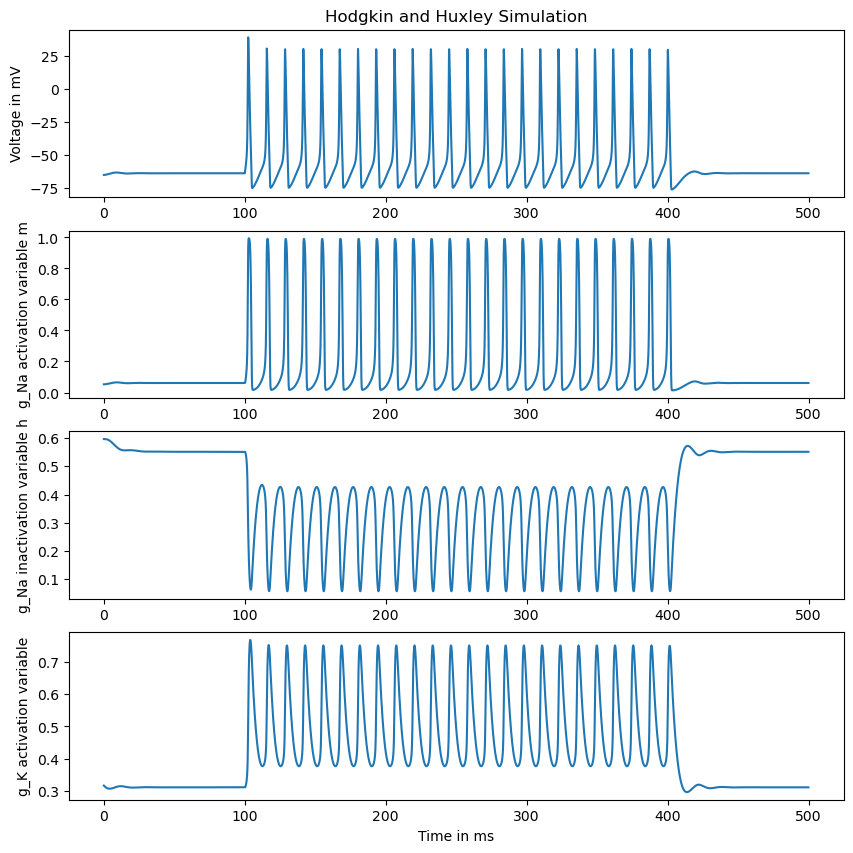

In [6]:
tStimStart  = 100             # time to start injecting current (ms)
tStimEnd    = 400            # time to end injecting current (ms)
tFinal      = 500           # total time of run (ms)
dt          = 0.1             # time step (ms)
Ie          = 100               # nA/mm^2
RestingPotential = -65       #mv

# Run the custom function
HHmodel(Ie, dt, tFinal, tStimStart, tStimEnd, RestingPotential)

In [8]:
HHmodel_threshold(np.arange(1, 200, 2))

With an external current of 14 nA/mm^2 threshold potential was finally reached!


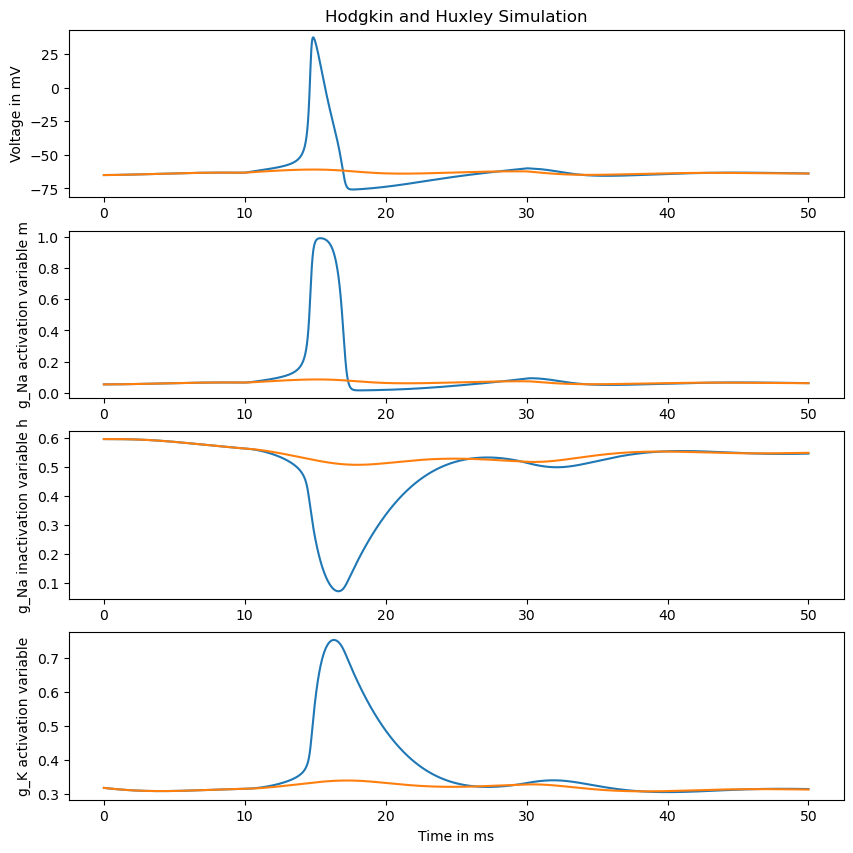

In [13]:
HHmodel_compare((10, 20), RestingPotential)